# Metodi Actor-Critic

Mario Fiorino

## Introduzione

I metodi Actor-Critic sono una classe di algoritmi di  policy gradient che combinano due strutture di memoria separate:

- **Actor**, per rappresentare la funzione di policy (o policy) che restituisce *una distribuzione di probabilità sulle azioni* che l'agente può intraprendere in base a un determinato stato. In questo contesto parametrizzata $\mathbf{θ}$. In simboli: $\pi(a_t|s_t;\mathbf{θ}) $

- **Critic**, per rappresentare una *funzione valore* (determinante per il controllo delle policy) che definisce il rendimento atteso (expected return) per un agente che inizia in un dato stato e agisce secondo una particolare policy. In questo contesto parametrizzata $\mathbf{w}$. Ad esempio: $V^{\pi}(s_t;\mathbf{w})$ oppure $Q^{\pi}(s_t,a_t;\mathbf{w})$

L'Actor è tipicamente implementato come una rete neurale che apprende una funzione di mappatura da stati ed azioni.

Anche il Critic, è spesso implementato come una rete neurale che apprende una funzione di valore, la quale risolve un problema di policy evaluation (vedi primi notebook del corso), ovvero: "quanto reward accumula la politica $π_θ$ con gli attuali parametri $\mathbf{θ}$ ?"

La principale differenza rispetto agli algoritmi di tipo REINFORCE (noti anche come: *Monte Carlo Policy Gradient*), descritti nel notebook precedente, è che in questi, il *reinforcing signal* usato per aggiornare $\mathbf{θ}$ i parametri della policy, è il ritorno $𝑅(𝜏)$, ovvero il semplice accumulo dei reward raccolti durante l'episodio.
Negli algoritmi Actor-Critic, invece, i parametri di una policy vengono aggiornati utilizzando qualcosa di più informativo e sofisticato: il *learned reinforcing signal*, generato mediante una funzione di valore (il Critic appunto) appresa durante il training

$\;$

**Vantaggi**

- Sono utili perché riducono la varianza, accelerando così l’apprendimento di un optimal policy rispetto i metodi REINFORCE.

- Sono adatti per applicazioni nello spazio continuo (lì dove i metodi REINFORCE danno problemi)

- Risultano particolarmente efficaci in ambienti caratterizzati da ricompense sparse (*sparse reward settings*), trasformando un contesto in cui l'agente riceve feedback solo in rare occasioni - ad esempio un $+1$ esclusivamente al completamento di un compito o dopo una lunga sequenza di azioni - in un segnale di rinforzo denso (*dense reinforcing signal*). Si noti,
in un contesto di ricompensa densa, l'agente riceve feedback con maggiore frequenza, tipicamente dopo ogni azione o ad intervalli regolari. Queste ricompense sono spesso continue o incrementali, fornendo un feedback costante durante l'esecuzione del compito.
Le ricompense dense agevolano significativamente l'apprendimento dell'agente, offrendo informazioni più immediate e dettagliate sulle conseguenze delle sue azioni.

$\;$

Al fine di rendere il simbolismo più conciso, si tenga a mente le equivalenze:

- $ \pi \equiv \pi_\mathbf{θ} \equiv \pi(a_t|s_t;\mathbf{θ})$

- $V_\mathbf{w} ^{\pi} (s_t) \equiv V^{\pi}(s_t;\mathbf{w})$

**Varianza e Bias**

Intuitivamente, la varianza (in inglese *variance*) di uno stimatore misura la sensibilità dello stimatore alle variazioni nei dati di input.

Quando calcoliamo un valore atteso (l' *expectation*; in simboli:  $\mathbb{E}[X]$) su un numero infinito di campioni (popolazione intera), otteniamo sempre lo stesso risultato, poiché stiamo considerando tutti i possibili casi.

Tuttavia, quando lavoriamo con un insieme finito di campioni (come accade nella realtà), ogni volta che calcoliamo il valore atteso potremmo ottenere risultati leggermente diversi. Questa variabilità nei risultati è ciò che chiamiamo varianza.

Bassa varianza: Uno stimatore con bassa varianza produce risultati che sono molto simili tra loro, anche se i dati di input cambiano leggermente.

Alta varianza: Uno stimatore con alta varianza produce risultati che possono fluttuare significativamente in risposta a piccole variazioni nei dati di input.

In pratica, un algoritmo di training di RL con alta varianza potrebbe produrre stime molto diverse tra loro, ogni volta che lo eseguiamo.

Il bias si riferisce a una distorsione sistematica nelle stime del valore atteso che un agente ricava riguardo una certa quantità. Con un bias elevato, uno stimatore (ricavato da un trainig) tende sistematicamente a sottostimare o sovrastimare il "valore vero".

In pratica, nel contesto RL, se durante il training, si aggiorna una stima dell'*expectation* (i.e. valore atteso della somma delle ricompense future) basandosi su una precedente stima errata, la stima dell'*expectation* che si ottiene, anche con un numero infinito di campioni, sarà anch'essa errata.

Per ulteriori approfondimenti:

Slide di Olivier Sigaud - Sorbonne Universitè:

https://dac.lip6.fr/wp-content/uploads/2022/09/rb_mc_mbrl.pdf

Geman, S., Bienenstock, E., Doursat, R. (1992). Neural networks and the bias/variance dilemma. Neural Computation : https://www.dam.brown.edu/people/documents/bias-variance.pdf

Una lettura interessante, The Primacy Bias in Deep Reinforcement Learning:

https://mila.quebec/en/article/the-primacy-bias-in-deep-reinforcement-learning#:~:text=We%20broadly%20define%20the%20primary,rest%20of%20the%20learning%20process.




####**Advantage Function**

Spesso nei problemi di RL, non è necessario descrivere quanto sia buona un'azione in senso assoluto, ma piuttosto quanto essa sia migliore o peggiore rispetto alle altre in media. In altre parole, vogliamo conoscere il suo vantaggio relativo. Questo concetto è formalizzato dalla *Advantage Function* (o semplicemente funzione Advantage), ovvero:

$A^{\pi}(s_t,a_t) = Q^{\pi}(s_t,a_t) - V^{\pi}(s_t)$.

Sia:

$V^{\pi}(s_t) = \mathbb{E}_{a\sim \pi} {Q^{\pi}(s_t,a_t)}$

in modo più esplicito:

$A^{\pi}(s_t,a_t) = Q^{\pi}(s_t,a_t) - \mathbb{E}_{a\sim \pi} {Q^{\pi}(s_t,a_t)}$.

In pratica, ci suggerisce di selezionare un'azione in base al suo comportamento rispetto alle altre (*better-than-average actions*) disponibili in un certo stato $s_t$; piuttosto che basarci sul valore assoluto dell'azione, come misurato dalla sola funzione $Q(s_t,a_t)$

$\;$

Vantaggio:

Il principale vantaggio tecnico dell'utilizzo della funzione Advantage è che riduce significativamente la varianza degli stimatori che fanno uso di tecniche  Policy Gradient.

A riguardo vedere il testo, Variance reduction techniques for gradient estimates in reinforcement learning. The Journal of Machine Learning Research, 2004: https://www.jmlr.org/papers/volume5/greensmith04a/greensmith04a.pdf

$\;$

Implementazione:

$I$.

La funzione Advantage potrebbe anche esser implementata da due funzioni $Q(s_t,a_t)$ , $V(s_t)$ che utilizzano parametri diversi, ad esempio due reti neurali. Ma non è sempre la strada più conveniente.

$II$.

Un approccio alternativo per ricavare la funzione Advantage consiste nell'utilizzare la seguente espressione:

$Q^π (s_t, a_t) = \mathbb{E}_{τ∼π} [r_t + γ r_{t+1} + γ^2 r_{t+2} + · · · + γ^n r_{t+n}] + γ^{n+1} V^π (s_{t+n+1})$

dove la funzione $Q^π$ è espressa come una combinazione dei singoli rewards nei prossimi $n$ step temporali, più il valore di $V^π (s_{t+n+1})$ nello stato immediatamente successivo ad $n$. Ad esempio per $n=0$ , si ottiene semplicemente:  $Q^π (s_t, a_t) = \mathbb{E}_{τ∼π} [r_t ] + γ V^π (s_{t+1})$

Al fine di dare uan stima a questa $Q^π (s_t, a_t)$, possiano estrarre una traiettoria di rewards $(r_1, . . . , r_n)$  (i.e. sostiutirla al posto dell' *expectation*), e usare una stima $\hat{V_π}
(s_{t+n+1})$ , ottenuta in qualche modo in preccedenza,  ad esempio, appresa dal Critic. In simbloi:

$Q^π (s_t, a_t) ≈ r_t + γ r_{t+1} + γ^2 r_{t+2} + · · · + γ^n r_{t+n} + γ^{n+1} \hat V^π (s_{t+n+1})$

La somma degli $n$ rewards estratti è una stima *unbiased*, ma ha un'elevata varianza poiché i rewards provengono da una sola traiettoria.  Mentre la stima $\hat V^π (s_{t+n+1})$ è da considerarsi uno stimantore con varianza inferiore poiché riflette un'*expectation* su tutte le traiettorie; ma contiene un bias elevato poichè è calcolato utilizzando un approssimatore, e non il "vero valore"; in pratica si basa cioè su un modello che potrebbe non catturare perfettamente la dinamica dell'ambiente.

Combinando la stima a $n$-step per $Q^π$ con $\hat V^π (s_{t})$, otteniamo una formula per stimare la
funzione Advantage:

$A^π _{n-step}(s_t, a_t) ≈ r_t + γ r_{t+1} + γ^2 r_{t+2} + · · · + γ^n r_{t+n} + γ^{n+1} \hat V^π (s_{t+n+1}) - \hat V^π (s_{t})$

All'aumentare di $n$, la varianza nelle stime di $A^π _{n-step}$ probabilmente inizierà ad aumentare. Invece, un valore piccolo di $n$ si traduce in uno stimatore con varianza inferiore ma con maggiori biases. Di fatto, l'iperparametro $n$, controlla il **tradeoff bias-variance**.

$III$.

Un approccio simile, ma più elaborato rispetto al $A^π _{n-step}$ per la stima della funzione Advantage, è rappresentato dal metodo del *Generalized Advantage Estimation (GAE)*.

Ovvero:

$A^π _{GAE} (s_t, a_t) = \sum _{l=0} ^∞ {(γ \; λ)^l \; δ_{t+l} }$

con:

$λ \in (0,1)$

e sia:

$δ_t = r_t + γ  V^π (s_{t+1}) - V^π (s_{t})$

L'idea di fondo è che invece di considerare un solo valore di $n$, combiniamo insieme più valori di $n$.
In altre parole, la stima della funzione Advantage viene calcolata utilizzando una media ponderata dei singoli Advantage calcolati con $n = 1, 2, ..., k$.

Per capire meglio la cosa:

$A ^\pi _t (n)$ rappresentare lo stimatore del Advantage calcolato mediante rewards a $n$-step. Quindi abbiamo, per $n=1$:

$A ^\pi _t (1) ≐  r_t + γ V^π (s_{t+1}) - V^π (s_{t})  \; = δ_t $

e poi:

$A ^\pi _t (2) ≐  r_t  + γ r_{t+1} + γ^2 V^π (s_{t+2}) - V^π (s_{t})  \; = δ_t + γδ_{t+1} $

$A ^\pi _t (3) ≐  r_t  + γ r_{t+1} + γ^2 r_{t+2} + γ^3 V^π (s_{t+3}) - V^π (s_{t})  \; = δ_t + γδ_{t+1} + γ^2 δ_{t+2} $

... ect

L' approccio GAE definisce una media ponderata esponenzialmente sui vari $A ^\pi _t (n)$, ovvero:

$A^π _{GAE} (s_t, a_t) = (1-λ) \; (A ^\pi _t (1) + λ A ^\pi _t (2) + λ^2 A ^\pi _t (3) + λ^4 A ^\pi _t (4) + ... )$

Più esplicitamente:

$A^π _{GAE} (s_t, a_t) = (1-λ) (\delta_t + λ(\delta_t + γ\delta_{t+1}) + λ^2(\delta _t + γ\delta _{t+1} + γ^2\delta _{t+2}) + ... )$

dove:

$δ_t = r_t + γ  V^π (s_{t+1}) - V^π (s_{t})$

In seguito a un paio di passaggi algebrici, si arriva alla formula finale vista all'inizio. A tal fine si consiglia la lettura:

Schulmanet al. “High-Dimensional Continuous Control Using Generalized Advantage Estimation”:

https://arxiv.org/pdf/1506.02438

Questo approccio mira a ridurre la varianza dello stimatore, mantenendo al contempo il bias introdotto il più contenuto possibile.

Per valori di $λ→1$

$A^π _{GAE} (s_t, a_t) → \sum_{l=0}^{\infty} \gamma^l r_{t+l} - V^\pi(s_t)$

in tal caso la stima di $A^π _{GAE} (s_t, a_t)$ rischia di avere un'elevata varianza dovuta alla presenza dei rewards da campionare.

Per valori di $λ→0$

$A^π _{GAE} (s_t, a_t) → r_t + \gamma V^\pi (s_{t+1}) - V^\pi(s_t)$

la stima di $A^π _{GAE} (s_t, a_t)$ è influenzata significativamente dal contributo della stima della funzione valore $V^\pi$,  il che introduce un certo grado di bias. Tuttavia, tale approccio è generalmente caratterizzato da una varianza bassa.

$\;$

Alcune considerazioni finali

1.

Sia le stime GAE che quelle a $n$-step includono:
- il *discount factor* $γ$

che controlla quanto un algoritmo “si preoccupa” delle ricompense future rispetto alla ricompensa attuale.

Inoltre, entrambi hanno un parametro che controlla il compromesso tra bias e varianza (*bias-variance tradeoff*) :
- $n$ per il metodo a $n$-step
- $λ$ per GAE.

Con la differenza che la stima GAE dovrebbe farlo in modo più graduale (o comunque meno netta del metodo a $n$-step )

2.

Gli autori di GAE si esprimono in merito al metodo da loro proposto affermando: "*Empirically, we find that the best value of $λ$ is much lower than the best value of $\gamma$*"

##### Appendice 1: **Exponentially-weighted average**

La media esponenziale ponderata è un metodo per calcolare una media dei dati in cui i valori recenti hanno un peso maggiore rispetto a quelli passati. Questo tipo di media attribuisce un'importanza decrescente ai valori più vecchi, utilizzando un fattore di decadimento $λ$.

Questo tipo di media è utile per analizzare dati che cambiano nel tempo.

Esempi:

1.

Sia $λ=0.8$ , $n=10$

$A _{n}  = (1-0.8) \; (a_{1} + 0.8 a_{2} + 0.64  a_{3} + ...  + 0.134 a_{10} )$

$A _{n}  = 0.2 a_{1} + 0.16 a_{2} + 0.128  a_{3} + 0.102 a_{4} + 0.08 a_{5} + 0.06 a_{6} + ...  + 0.02 a_{10} $

2.

Sia $λ=0.1$ , $n=10$

$A_n = 0.9a_1 + 0.09a_2 + 0.009a_3 + 0.0009a_4 + 0.00009a_5 + 0.000009a_6 + ... + 0.0000000009a_{10}$

I coefficienti decrescono rapidamente, dando un peso maggiore solo ai primi termini  

3.

Sia $λ=0.99$ , $n=10$

$A_n = 0.01a_1 + 0.0099a_2 + 0.0098a_3 + 0.0097a_4 + 0.0096a_5 + \cdots + 0.0091a_{10}$

Qui i coefficienti sono molto più vicini tra loro rispetto agli altri esempi di  $λ$, dando un peso relativamente simile a tutti i termini.

$\;$

Basi matematiche:

Si consideri la segunete serie Geometrica

$S_n=\sum_{k=0} ^n λ^k=1+λ+λ^2+...+λ^n$

in analisi matematica si dimostra che:

$S_n=\sum_{k=0} ^n λ^k=1+λ+λ^2+...+λ^n = (1-λ^{n+1})/(1-λ)$

e nel caso in cui $|λ|< 1$ ed $ n → \infty $ la serie converge:

$S_\infty=\sum_{k=0} ^∞ λ^k = 1/(1-λ)$

Moltiplicando per $(1-λ)$ si assicura che la somma sia normalizzata ad $1$:

$S_\infty = (1-λ) ⋅ \sum_{k=0} ^∞ λ^k =1$


#### **Per l'apprendimento della funzione valore (Critic)**

Si noti che i due approcci, prima descritti, per stimare la funzione Advantage presuppongono che sia disponibile una stima della funzione valore $V^\pi$.

Nel contesto del deep RL, una strategia comune per apprendere tale stima di $V^\pi$, consiste nel:

1. parametrizzare $V^\pi$, cioè scriverla in funzione di qualche parametro, ovvero $V^{\pi}(s_t;\mathbf{w})$
2. generare un valore target $V^{\pi} _{target} (s_t)$
3. minimizzare la differenza tra la stima corrente in uscita della funzione valore $\hat{V^\pi} (s_t;\mathbf{w})$  e il target $V^{\pi} _{target} (s_t)$, utilizzando una *regression loss* come la Mean Squared Error (MSE).
4. Ripetere il processo fino ad un accettabile convergenza.

Il target $V^{\pi} _{target} (s_t)$ può essere generato impiegando diverse tecniche di stima:
- Temporal Difference one step:  $V^{\pi} _{target} (s_t)  ≈ r_t + \hat{V^\pi} (s_{t+1};\mathbf{w})$

- Temporal Difference $n$-step:  $V^{\pi} _{target} (s_t)  ≈ r_t +  γ \; r_{t+1} + · · · + γ^n \; r_{t+n} + γ^{n+1} \; \hat{V^\pi}(s_{t+n+1};\mathbf{w})$

- Monte Carlo; $V^{\pi} _{target} (s_t)  ≈ \sum _{t'=t} ^T {γ^{t'- t} \; r_{t'} }$

- GAE optimization: $V^{\pi} _{target} (s_t)  ≈ A^π _{GAE} (s_t, a_t) + \hat{V^\pi} (s_{t};\mathbf{w})$

ect ...

#####Appendice 2: **Temporal Difference (TD) learning**

Il TD learning è un meccanismo che consente di propagare nel tempo, le informazioni relative alla funzione di ricompensa di un ambiente, sfruttando una combinazione di ricompense immediate e stime future.

L'intuizione dietro il metodo TD learning risiede nel fatto che i valori della funzione valore (che sia $Q$ o $V$) relativi al passo temporale corrente possono essere definiti in termini dei valori della funzione valore del passo temporale successivo, sfruttando l'equazione di Bellman:

per la *State-Value Function* abbiamo quindi:

$V^{\pi}(s_t) = \mathbb{E}_{a_{t}\sim \pi(\cdot | s_{t})},_{s_{t+1}\sim P(\cdot |s_t,a_t)} [{r_t + \gamma \; V^{\pi}(s_{t+1})}] $

mentre per l *Action-Value Function*:

$ Q^{\pi}(s_t,a_t) = \mathbb{E}_{s_{t+1}\sim P(\cdot |s_t,a_t)} \Bigr[ {r_t + \gamma \; \mathbb{E}_{a_{t+1}\sim \pi(\cdot | s_{t+1})}{ [Q^{\pi}(s_{t+1},a_{t+1})}] } \Bigr] $

dove:

$s_{t+1}\sim P(\cdot |s_t,a_t)$ indica che il prossimo stato $s_{t+1}$ viene campionato secondo le regole (i.e. la distribuzione di probabiltà $P(\cdot |s_t,a_t)$) di transizione dell'ambiente.

$r_t$ è il reward ottenuto nello stato $s_t$ eseguendo l'azione $a_t$, avvolte espresso come $r_t = \textit{R}(s_t, a_t, s_{t+1})$

$\pi(\cdot | s_{t+1})$ definisce la distribuzione probabilistica delle azioni $a_{t+1}$ condizionata sullo stato $s_{t+1}$

Suggerisco poi alla lettura di un passo molto interessante del testo:

Foundations of Deep Reinforcement Learning: Theory and Practice in Python di Laura Graesser, Wah Loon Keng; - Sezione 3.2 -

"*Assume we have a neural network to represent the Q-function, $Q^θ$. In TD learning,
$Q^π _{target} (s_t, a_t)$ is derived by estimating the right-hand side of Q-Bellman Equation using $Q^θ$. At each training iteration, $\hat{Q}^π (s_t, a_t)$ is updated to bring it closer to $Q^π _{target} (s_t, a_t)$. If $Q^π _{target} (s_t, a_t)$ is derived using the same neural network which produces $\hat{Q}^π (s_t, a_t)$, then why does this work? Why can it result in a good approximation of the Q-function after many steps? ... in brief, $Q^π _{target} (s_t, a_t)$ uses information one time step into the future when compared with $\hat{Q}^π (s_t, a_t)$ and thus has access to the reward $r$ from the next state $s$. Consequently, $Q^π _{target} (s_t, a_t)$  is slightly more informative about how the trajectory will ultimately turn out. Underlying this formulation is the assumption that information about the objective—maximizing cumulative rewards—is revealed as the trajectory progresses and is not available at the start of an episode. This is a fundamental characteristic of RL problems.*"


## Update: One-step Actor-Critic

Ai fini didattici, consideriamo, per la sua semplicità, l'algoritmo Actor-Critic: One-step Actor-Critic (episodic), nel testo di Sutton a pagina PDF 354.


<div>
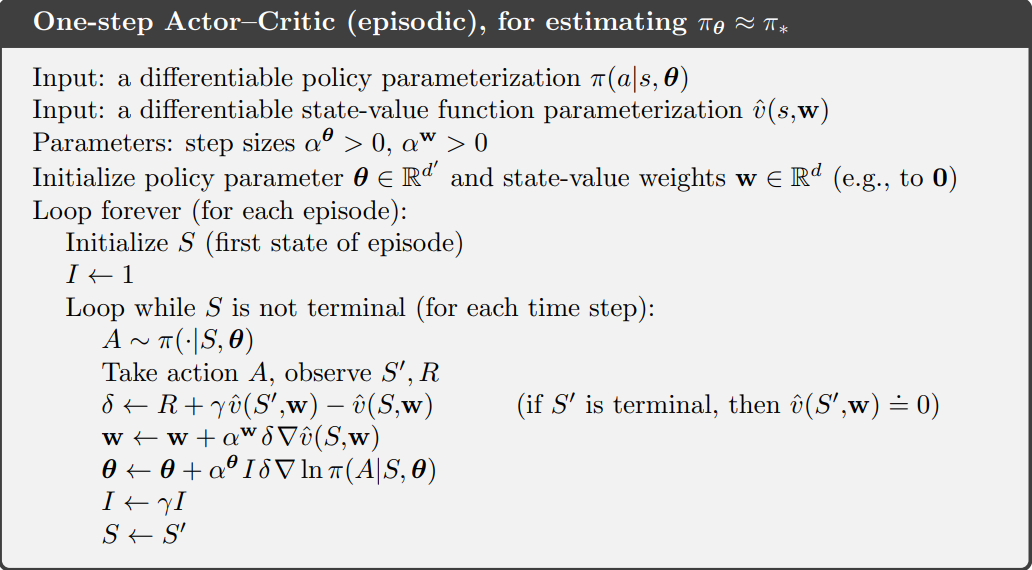
</div>

**Critic update**:

Campionata al time step $t$, in base alla policy $\pi_\theta$, un azione $a_t$ nello stato $s_t$, ed osservati il next state $s_{t+1}$ ed il reward ottenuto $r_t$.

Ricavato il segnale TD error relativo alla policy:

$ \delta_t = [r_t + γ \hat{V^\pi} (s_{t+1};\mathbf{w}_t)]  - \hat{V^\pi } (s_t;\mathbf{w}_t)$

da notare il *TD-one step Target* (noto anche come: *TD one-step return* - Sutton PDF 165 ): $\;$
$[ r_t + γ \hat{V^\pi} (s_{t+1}; \mathbf{w}_t) ] $.

La loss function da minimiazzare : $\; \delta_t ^2$

L' update dei parametri del Critic avviene sfruttando i metodi *Semi-Gradient TD(0)*:

$ \mathbf{w}_{t+1}  ← \mathbf{w}_t + α_w  \cdot \delta_t \cdot ∇_{\mathbf{w}} \hat{V^\pi}(s_t;\mathbf{w}_t)$

Dove $α_w$ è il learning rate specifico dei parametri $\mathbf{w}$

$\;$

Appendice: La matematica dei Semi-Gradient

Per i passaggi matematici che portano alla formulazione di tale update, consulta il notebook: https://github.com/MarioFiorino/Tutorial-Reinforcement-Learning-ITA-Python/blob/main/Value_Function_Approximation_Compendio.ipynb

Si ricorda per i Metodi *Semi-gradient* l'aggiornamento viene ricavato  non dal vero gradiente rispetto $\mathbf{w}_t$ della funzione $ \delta_t (\mathbf{w}_t) = [r_t + γ \hat{V^\pi} (s_{t+1};\mathbf{w}_t)]  - \hat{V^\pi } (s_t;\mathbf{w}_t)$,
ma utilizzando solo in parte la formula della sua derivata.

Formalmente la derivata del quadrato di una funzione : $∇_{\mathbf{w}} \delta_t^2 (\mathbf{w}_t)  = 2 \; \delta_t \; ∇_{\mathbf{w}} \delta_t(\mathbf{w}_t) $

Ma nella formula usata nell'update dei parametri, abbiamo:

$∇_{\mathbf{w}} \delta_t^2 (\mathbf{w}_t)  ≈ \delta_t \; ∇_{\mathbf{w}} \hat{V^\pi}(s_t;\mathbf{w}_t) $

ossia:

$∇_{\mathbf{w}} \delta_t (\mathbf{w}_t)  ≈  ∇_{\mathbf{w}} \hat{V^\pi}(s_t;\mathbf{w}_t) $

ignorando così la dipendenza del *TD-one step Target* dai parametri in fase di aggiornamento (il vero gradiente includerebbe questa dipendenza, il che significa dover derivare anche rispetto al Target, che in questo caso è trattato al pari di una costante).

Nonostante il successo pratico dei metodi *Semi-gradient*, la comprensione teorica completa del perché funzionano non è ancora del tutto chiara.

$\;$

**Actor update**:

L' update dei parametri del Actor avviene sfruttando i metodi Policy Gradient. In particolare si generalizza il *Policy Gradient Theorem*, visto nel precedente notebook, includendo un confronto del valore dell'azione con una baseline : *Policy Gradient Theorem with baseline* (Sutton PDF 351 - 13.4 REINFORCE with Baseline). Nell'algoritmo One-step Actor-Critic,  il *full return* : $R_t(\tau) = r_t + \gamma r_{t+1} + ... + \gamma^T r_{T} $ che troviamo nell'algoritmo REINFORCE;  viene sostituito dal *TD one-step return* ; e utilizzata la funzione state-value appresa, come baseline. In simboli:

$ \delta_t = [r_t + γ \hat{V^\pi} (s_{t+1};\mathbf{w}_t)]  - \hat{V^\pi } (s_t;\mathbf{w}_t)$

L' update dei parametri durante il training risulta:

$ \mathbf{θ}_{t+1} ← \mathbf{θ}_t + α_θ  \cdot \delta_t \cdot ∇_{θ} \log  \pi_\mathbf{θ} (a_t|s_t;\mathbf{θ}_t)$

Dove $α_θ$ è il learning rate specifico dei parametri $\mathbf{θ}$

$\;$

Appendice: Actor update - variante

In alternativa, invece di utilizzare il segnale TD error $ \delta_t$ , possiamo usare una stima della funzione Advantage:

$ \mathbf{θ}_{t+1} ← \mathbf{θ}_t + α_θ  \cdot \hat{A^π}
(s_t, a_t) \cdot ∇_{θ} \log  \pi_\mathbf{θ} (a_t|s_t;\mathbf{θ}_t)$


$\;$

**Convergenza**

L'algoritmo One-step Actor-Critic converge asintoticamente ad un ottimo locale, in condizioni di approssimazione stocastica standard (stochastic approximation conditions) su entrambi i learning rate.

$\;$

Ref:

Reinforcement Learning: An Introduction. Richard S. Sutton and Andrew G. Barto. 2018

http://www.incompleteideas.net/book/ebook/node66.html

Foundations of Deep Reinforcement Learning: Theory and Practice in Python di Laura Graesser, Wah Loon Keng.

High-Dimensional Continuous Control Using Generalized Advantage Estimation :
https://arxiv.org/pdf/1506.02438

Slide di Alan Fern :
https://web.engr.oregonstate.edu/~afern/classes/cs533/notes/rl3.pdf

Asynchronous Methods for Deep Reinforcement Learning : https://proceedings.mlr.press/v48/mniha16.pdf

## Compendio sulla tipologia dei metodi Policy Gradient

<div>
<img src="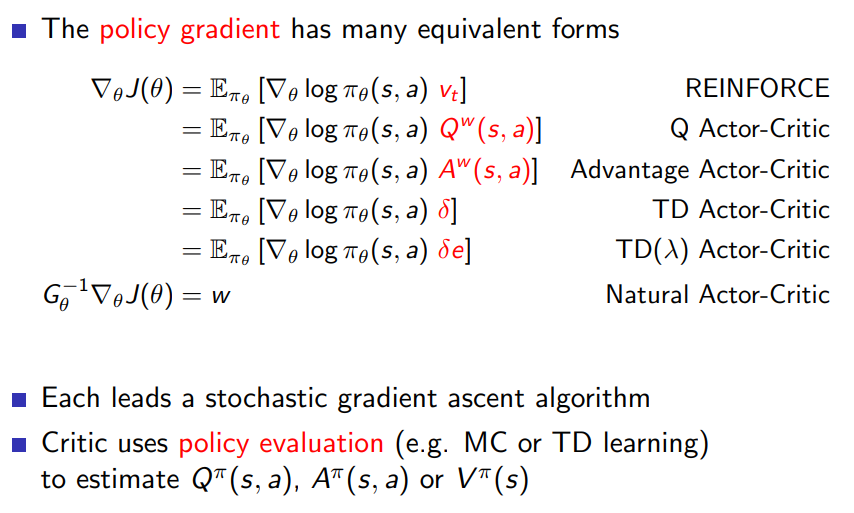
", width="400">
</div>

Compendio del corso di David Silver:

https://www.davidsilver.uk/wp-content/uploads/2020/03/pg.pdf

## Entropy regularization


Premessa

Nell'ambito dell'informatica, l'**entropia** è usata per quantificare il grado di casualità (*randomness*) di una variabile casuale. In parole semplici ci dice quanto sia imprevedibile o incerto un certo evento.

Consideriamo l'esempio di una moneta. Se la moneta è truccata in modo tale che la probabilità di ottenere testa sia molto più alta di quella di ottenere croce, la sua entropia sarà bassa. Ciò significa che il risultato del lancio è prevedibile con alta probabilità e l'informazione contenuta nel lancio è limitata. Al contrario, se la moneta non è truccata e ha uguali probabilità di cadere su testa o croce, la sua entropia sarà più alta.


Entropia di una moneta truccata:

$H(d_1) =-[\frac{3}{4}\log\frac{3}{4}+\frac{1}{4}\log\frac{1}{4}]=0.56$

Entropia di una moneta onesta:

$H(d_2)=-[\frac{1}{2}\log\frac{1}{2}+\frac{1}{2}\log\frac{1}{2}]= 0.69$

$\;$

**Entropy-regularized**

L' Entropy Regularization è un meccanismo di regolarizzazione comunemente utilizzato nei metodi RL Policy gradient, basato sul concetto di entropia, che mira a gestire l' *exploration-exploitation trade-off*.

Il suo scopo è  promuovendo una maggiore diversità nelle azioni selezionate dalla policy durante il processo di apprendimento.

**Definizione**

L' entropia $H$ rispetto alla distribuzione di probabilità $P(\cdot|s_t)$ sulle azioni disponibili in un certo stato al time-step $t$; è definita come:

$H_t = \mathbb{E}_{a \sim P(\cdot|s_t)} [{-\log p(a)}] \; = \; - ∑_a \big( \;p(a) \cdot log \; p(a) \; \big)$

dove $p(a)$ rappresenta la probabilità associata ad una certa azione $a$ nello stato $s_t$. La sommatoria sulle azioni considera il fatto che ci siano più azioni disponibili, con probabilità diverse, in uno stesso stato.


Implementazione in Pytorch - entropia di una distribuzione a due azioni

In [ ]:
import torch
from torch.distributions import Categorical

p_tensor = torch.Tensor([0.999, 0.001])  # la prima azione è estremamente probabile
print(p_tensor)
entropy = Categorical(probs = p_tensor).entropy()
print(entropy) # il valore dell'entropia è molto basso

tensor([0.9990, 0.0010])
tensor(0.0079)


In [ ]:
p_tensor = torch.Tensor([0.5, 0.5])  # qui abbiamo un rapporto di 50-50
print(p_tensor)
entropy = Categorical(probs = p_tensor).entropy()
print(entropy) # il valore dell'entropia è molto più alto rispetto il caso precedente

tensor([0.5000, 0.5000])
tensor(0.6931)


La stesso cosa ma implementa in Numpy

In [ ]:
import numpy as np

p = np.array([0.999, 0.001])
logp = np.log(p)
entropy1 = np.sum(-p*logp)
print(entropy1)

0.007907255112232087


Implementazione in Pytorch, e poi in Numpy, dell' entropia differenziale di una distribuzione normale.

Possibile esempio d'uso: un azione a valori continui, con distribuzione normale.

Formula dell'entropia differenziale di una distribuzione normale

https://en.wikipedia.org/wiki/Differential_entropy

<div>
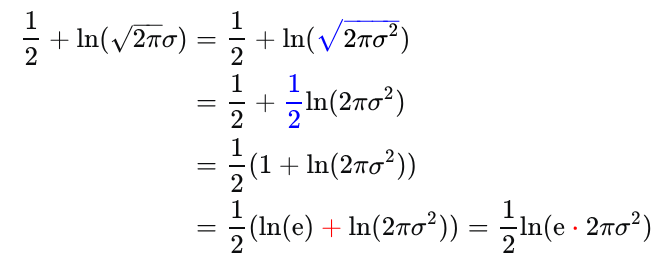
</div>


In [ ]:
# Differential entropy (aka continuous entropy)
# in Pytorch

import torch
from torch.distributions import Normal


# Media e deviazione standard
mu = 1.0
sigma = [0.98, 0.50, 0.25, 0.01, 0.001, 1e-9, 1e-18] #  in base alla deviazione standard il valore
                                                     #   dell'entropia varia. Tende a -∞
                                                     #     per valori della stdev che tende a zero

for std in sigma:
  # Normal distribution
  normal_dist = Normal(loc=mu, scale=std)
  # Calcolo dell entropia differenziale
  entropy = normal_dist.entropy()
  print(f"mu= {mu}; stdev = {std};\tEntropia : {entropy.item()}")


mu= 1.0; stdev = 0.98;	Entropia : 1.3987358808517456
mu= 1.0; stdev = 0.5;	Entropia : 0.725791335105896
mu= 1.0; stdev = 0.25;	Entropia : 0.03264415264129639
mu= 1.0; stdev = 0.01;	Entropia : -3.1862316131591797
mu= 1.0; stdev = 0.001;	Entropia : -5.488816738128662
mu= 1.0; stdev = 1e-09;	Entropia : -19.30432891845703
mu= 1.0; stdev = 1e-18;	Entropia : -40.02759552001953


In [ ]:
# in Numpy

import numpy as np

#  Mean e standard deviation
mu = 1.0
sigma = [0.98, 0.5, 0.2, 0.01, 0.001, 1e-9, 1e-18]

for std in sigma:
  # Normal distribution
  normal_dist = Normal(loc=mu, scale=std)
  # Calcolo dell entropia differenziale
  entropy = 0.5 * np.log(2 * np.pi * np.e * std**2)
  print(f"mu= {mu}; stdev = {std};\tEntropia : {entropy.item()}")

mu= 1.0; stdev = 0.98;	Entropia : 1.3987358258871532
mu= 1.0; stdev = 0.5;	Entropia : 0.7257913526447274
mu= 1.0; stdev = 0.2;	Entropia : -0.1904993792294276
mu= 1.0; stdev = 0.01;	Entropia : -3.1862316527834187
mu= 1.0; stdev = 0.001;	Entropia : -5.488816745777465
mu= 1.0; stdev = 1e-09;	Entropia : -19.30432730374174
mu= 1.0; stdev = 1e-18;	Entropia : -40.02759314068815


$\;$

**Perché l'entropia?**

Per comprendere il motivo per cui l'entropia è usata per incentivare l'esplorazione, si osservi innanzitutto che una distribuzione uniforme presenta un'entropia maggiore rispetto le altre.

Una distribuzione uniforme delle azioni di una politica implica una maggiore diversità nelle azioni selezionate.

Al contrario, policy caratterizzate da una distribuzione meno uniforme, che privilegiano un insieme ristretto di azioni, sono associate a un'entropia inferiore.

Per tanto un aumento dell'entropia può tradursi in una maggiore esplorazione, che può accelerare l’apprendimento, e/o, impedire che la politica converga prematuramente verso *bad local optimum*.


Ridefiniamo adesso la nostra funzione obiettivo:

$ J(\mathbf{θ})= V^{\pi_\theta}(s_0) =  \mathbb{E}_{\tau \sim \pi_\theta} \bigg[ {\sum_{t=0}^{T}  \gamma^t ( r_t + \beta H_t ) \bigg] }$

Con:

Sia una $\tau$ certa traiettoria di eventi stato-azione campionata dalla policy $\pi_\theta$ che parte da un stato iniziale $s_0$

$H_t = H (\pi_\theta (\cdot|s_t) )$, indica *Entropy bonuses* per ogni timestep. Lo si puo pensare come una sorta di reward-extra ad ogni timestep, proporzionale all'entropia della policy. Nota: $H_t >0$ per definizione.

$\pi_\theta (\cdot|s_t)$ indicata distribuzione di probabilità sulle azioni disponibili in un certo stato $s_t$

$\beta > 0$, parametro (*temperature parameter*) determina l'importanza relativa dell' entropia rispetto alla ricompensa. Per $\beta → 0$ la formula si riduce al classico problema di *Policy gradient*.

Inoltre, si tenga a mente, che valgono le seguenti equazioni:

$V^{\pi}(s_t) = \mathbb{E}_{a_t \sim \pi} \bigg[ {Q^{\pi}(s_t,a_t)} \bigg] + \beta  H\left(\pi(\cdot|s_t)\right)  = \mathbb{E}_{a_t \sim \pi} \bigg[ {Q^{\pi}(s_t,a_t) - \beta \; \log  \pi(a_t|s_t)} \bigg] $

$\;$

L'idea di fondo è trovare i parametri $\mathbf{θ}$, in modo tale che la policy agisca per massimizzare *expected future return + entropy*.
(per maggiori info: https://spinningup.openai.com/en/latest/algorithms/sac.html)


$\;$

**Entropy regularization nell' update dei parametri dell' Actor**

Per calcolare $\nabla_{\theta} J(\mathbf{θ}) $ ed implementare updated dell' Actor ,  si applicano tutte le considerazioni prima discusse ( così come quelle riportate nel notebook precedente ) riguardanti il  *Policy Gradient Theorem* e le sue generalizzazioni.

Utilizzando la funzione Advantage, la loss da implementare nel training è la seguente:

${Loss}(\mathbf{θ}_t) =  \hat{A^π}
(s_t, a_t) \cdot  \log  \pi_\mathbf{θ} (a_t|s_t) -  β \log  \pi_\mathbf{θ} (a_t|s_t) $

Valori di $\beta$ più elevati promuovono una maggiore esplorazione dello spazio delle azioni. Il valore "giusto" (quello che porta all'apprendimento più stabile/con la ricompensa più alta) può variare da ambiente ad ambiente e potrebbe richiedere una lunga messa a punto.


## Supplemento:

####**Scelta dell'architettura di rete negli algoritmi Actor-Critic: una rete condivisa o due reti separate?**

Concettualmente, l’apprendimento di $π$ e di $V^{π}(s)$ appaiono collegati.

Apprendere $V^{π}(s)$ significa valutare gli stati in modo efficace, mentre imparare $π$ implica comprendere come compiere le azioni migliori in quegli stati.
Inoltre, entrambe le funzioni condividono lo stesso input.


**Esempio di architettura condivisa**

Gli strati inferiori della rete sono condivisi, creando una rappresentazione comune dello spazio degli stati.

Gli strati superiori sono specifici per Actor e Critic, poiché i loro output sono diversi: una distribuzione probabilistica sulle azioni per il primo, e uno scalare per il Critic.

**Pros / cons. di un architettura condivisa**

Apprendere una buona approssimazione delle funzioni $π$ e di $V^{π}(s)$, richiede, in entrambi i casi, l'apprendimento di una rappresentazione dello spazio degli stati che consenta di raggruppare insieme gli stati simili. La condivisione può favorire una rappresentazione comune dello spazio degli stati, utile per entrambi i compiti.

Riduce il numero totale di parametri da apprendere, migliorando l’efficienza dell'addestramento

Rende l’apprendimento meno stabile, poiché i gradienti del policy loss e del value loss hanno spesso scale diverse e possono entrare in conflitto.
È necessario bilanciare questi gradienti, ad esempio scalando uno dei due tramite aggiunta di un peso scalare. Tuttavia, ciò introduce un nuovo iperparametro da ottimizzare.

Ref.

Foundations of Deep Reinforcement Learning: Theory and Practice in Python di Laura Graesser, Wah Loon Keng - Sezione: 6.5 Network Architecture